In [68]:
from tensorflow.keras import datasets
import tensorflow as tf
import matplotlib.pyplot as plt


In [69]:
# 데이터셋 로드하기
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [70]:
train_images = train_images/255.0
test_images = test_images/255.0

In [75]:
# 데이터 분리
X_train, X_valid = train_images[:-10000], train_images[-10000:]
y_train, y_valid = train_labels[:-10000], train_labels[-10000:]


In [76]:
print(X_train.shape )
print(X_valid.shape)

print(y_train.shape)
print(y_valid.shape)

(50000, 28, 28)
(10000, 28, 28)
(50000,)
(10000,)


In [91]:
X_train[0].reshape(28, 28, 1)
X_train[0].shape

(28, 28)

In [86]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop, Adam


model = tf.keras.models.Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                 activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                 activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))


In [87]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_109 (Conv2D)         (None, 28, 28, 32)        832       
                                                                 
 conv2d_110 (Conv2D)         (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_35 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_111 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 conv2d_112 (Conv2D)         (None, 14, 14, 64)        36928     
                                                     

In [88]:
# Define the optimizer
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(0.001), metrics=["accuracy"])

In [89]:
# Fit the model
history = model.fit((X_train, y_train), epochs=10, validation_data = (X_valid, y_valid))


Epoch 1/10


ValueError: in user code:

    File "c:\Users\AI06\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\AI06\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\AI06\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\AI06\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\AI06\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\AI06\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 200, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "sequential_28" expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 28, 28) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None,) dtype=uint8>]


In [33]:

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1622 - accuracy: 0.9388 - val_loss: 0.3354 - val_accuracy: 0.8930
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1496 - accuracy: 0.9431 - val_loss: 0.3350 - val_accuracy: 0.8974
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1394 - accuracy: 0.9463 - val_loss: 0.3863 - val_accuracy: 0.8984
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1328 - accuracy: 0.9491 - val_loss: 0.3891 - val_accuracy: 0.8998
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1253 - accuracy: 0.9526 - val_loss: 0.3941 - val_accuracy: 0.8944
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1188 - accuracy: 0.9549 - val_loss: 0.3988 - val_accuracy: 0.8996
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1115 - accuracy: 0.9580 - val_loss: 0.4180 - val_accuracy

In [34]:
score = model.evaluate(X_test, test_labels)  # loss, accuracy
score

313/313 [==============================] - 1s 3ms/step - loss: 0.5130 - accuracy: 0.8909


[0.5129547119140625, 0.8909000158309937]

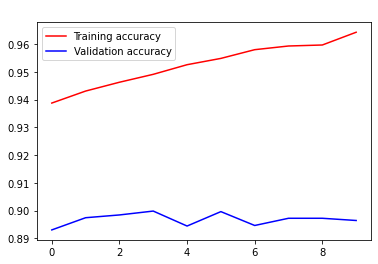

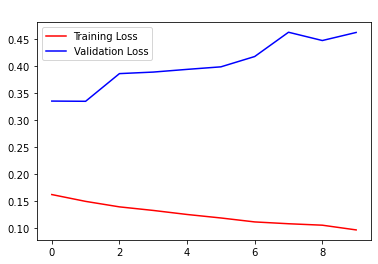

In [35]:
def plot_history():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('accuracy plot', color='white')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('loss plot', color='white')
    plt.legend()

    plt.show()


plot_history()
